In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
data = pd.read_csv("/Users/maenikeeva/PycharmProjects/PythonProject/personality_dataset.csv")
print(data.head(5))

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [14]:
def get_dime(data):
    print(data.shape[0], "строк")
    print(data.shape[1], "столбцов")
get_dime(data)

2900 строк
8 столбцов


In [33]:
def get_metadata(data):
    print("Числовые данные:", ', '.join(data.select_dtypes(include=["float64", "int64"]).columns))
    print("Категориальные данные:", ', '.join(data.select_dtypes(include=["object"]).columns))
get_metadata(data)

Числовые данные: Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency
Категориальные данные: Stage_fear, Drained_after_socializing, Personality


In [17]:
print("ПОСЛЕ ЧИСТКИ ОТСУТСТВУЮЩИХ ЗНАЧЕНИЙ")
get_dime(data)

ПОСЛЕ ЧИСТКИ ОТСУТСТВУЮЩИХ ЗНАЧЕНИЙ
2477 строк
8 столбцов


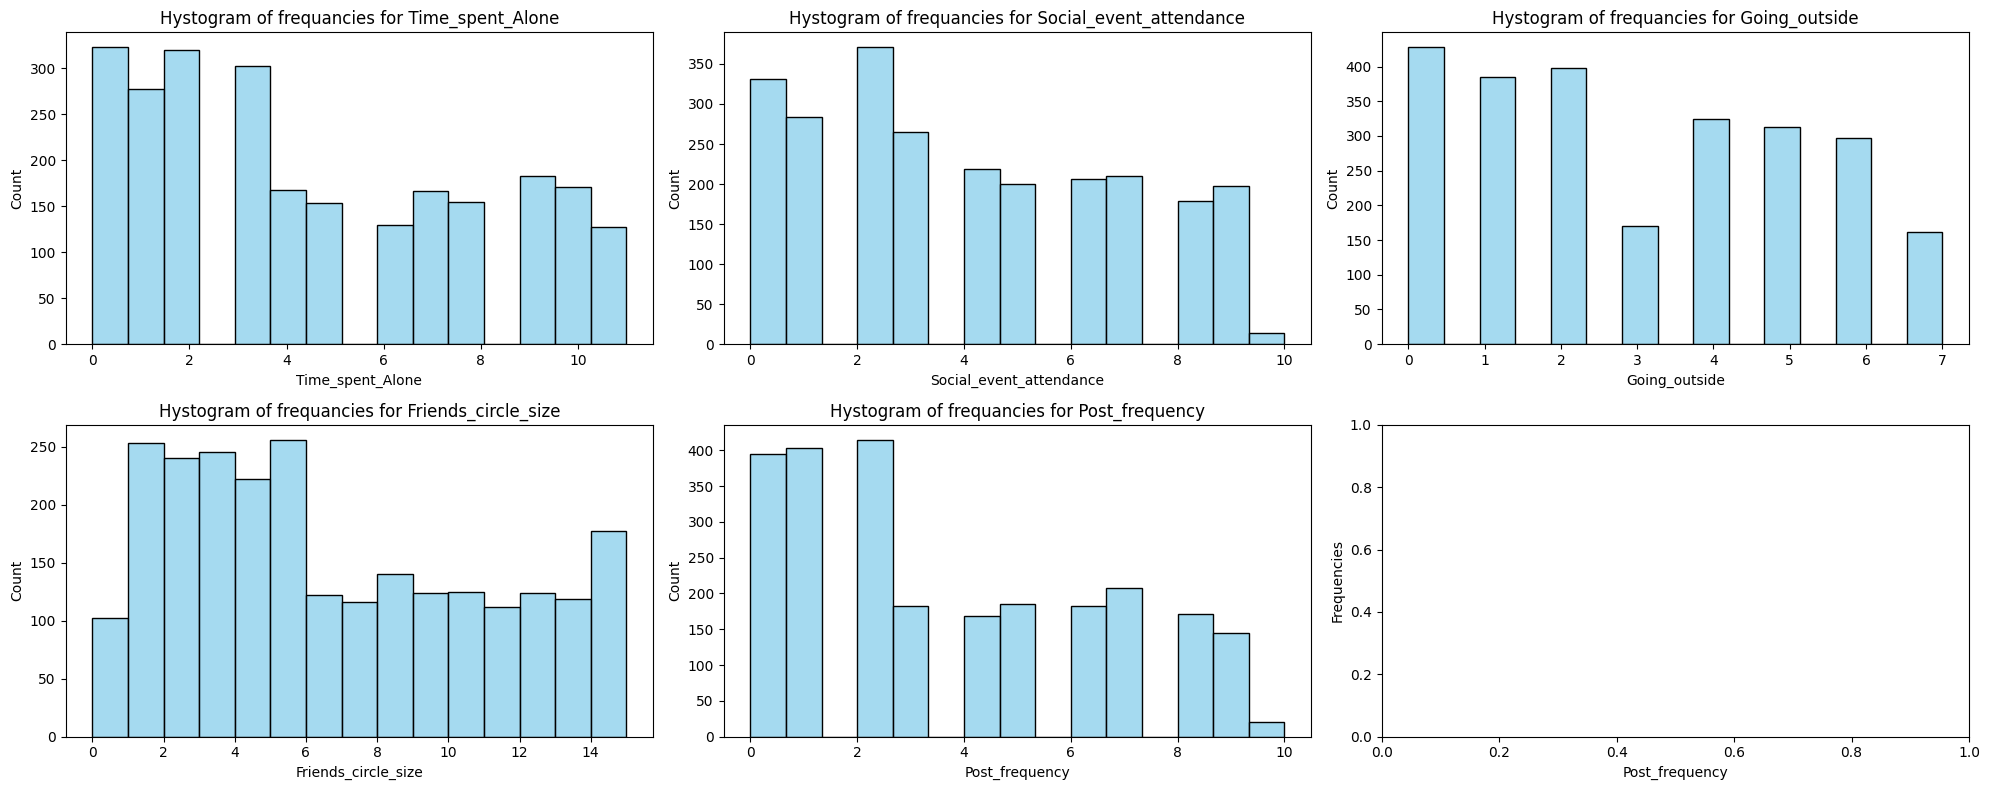

In [18]:
variables = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
def histogram(data, variables, bins = 15):
    ncol_plots = 3
    nrow_plots = (len(variables) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (20, 4*nrow_plots))
    ax = ax.flatten()
    for i, col in enumerate(variables):
        sbn.histplot(data = data[col], ax = ax[i], color = "skyblue", bins = bins)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
        ax[i].set_title(f"Hystogram of frequancies for {col}", fontsize = 12)
    plt.tight_layout()
    plt.show()
histogram(data, variables)

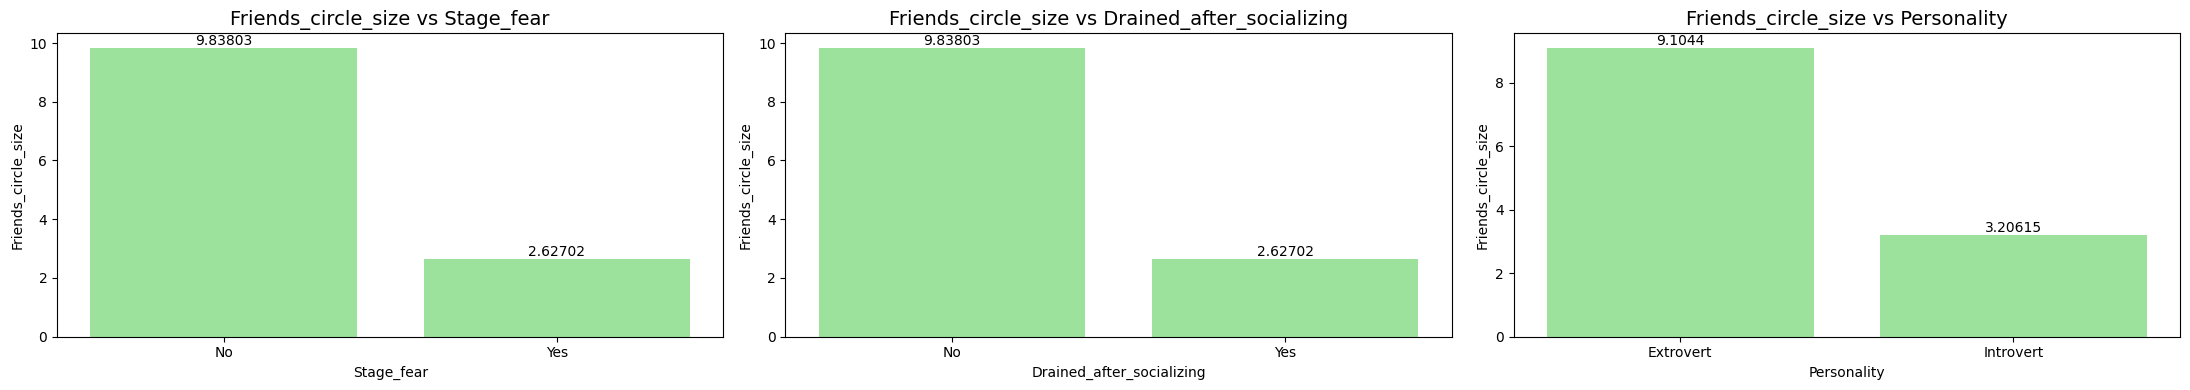

In [19]:
def bivariate_plots(data, x_var, y_var):
    ncol_plots = 3
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize=(22, 4 * nrow_plots))
    ax = ax.flatten()
    for i, col in enumerate(x_var):
        ax[i] = sbn.barplot(data=data, x=col, y=y_var, ax=ax[i], color='lightgreen', errorbar=None)
        ax[i].bar_label(ax[i].containers[0], fontsize=10)
        ax[i].set_title(f"{y_var} vs {col}", fontsize=14)
        plt.xlabel(col)
        plt.ylabel(y_var)
    plt.tight_layout()
    plt.show()
x_var = data.select_dtypes(include=["object"]).columns.tolist()
#как число друзей зависит от страха сцены, утомления после общения и типа личности
y_var1 = 'Friends_circle_size'
bivariate_plots(data, x_var, y_var1)

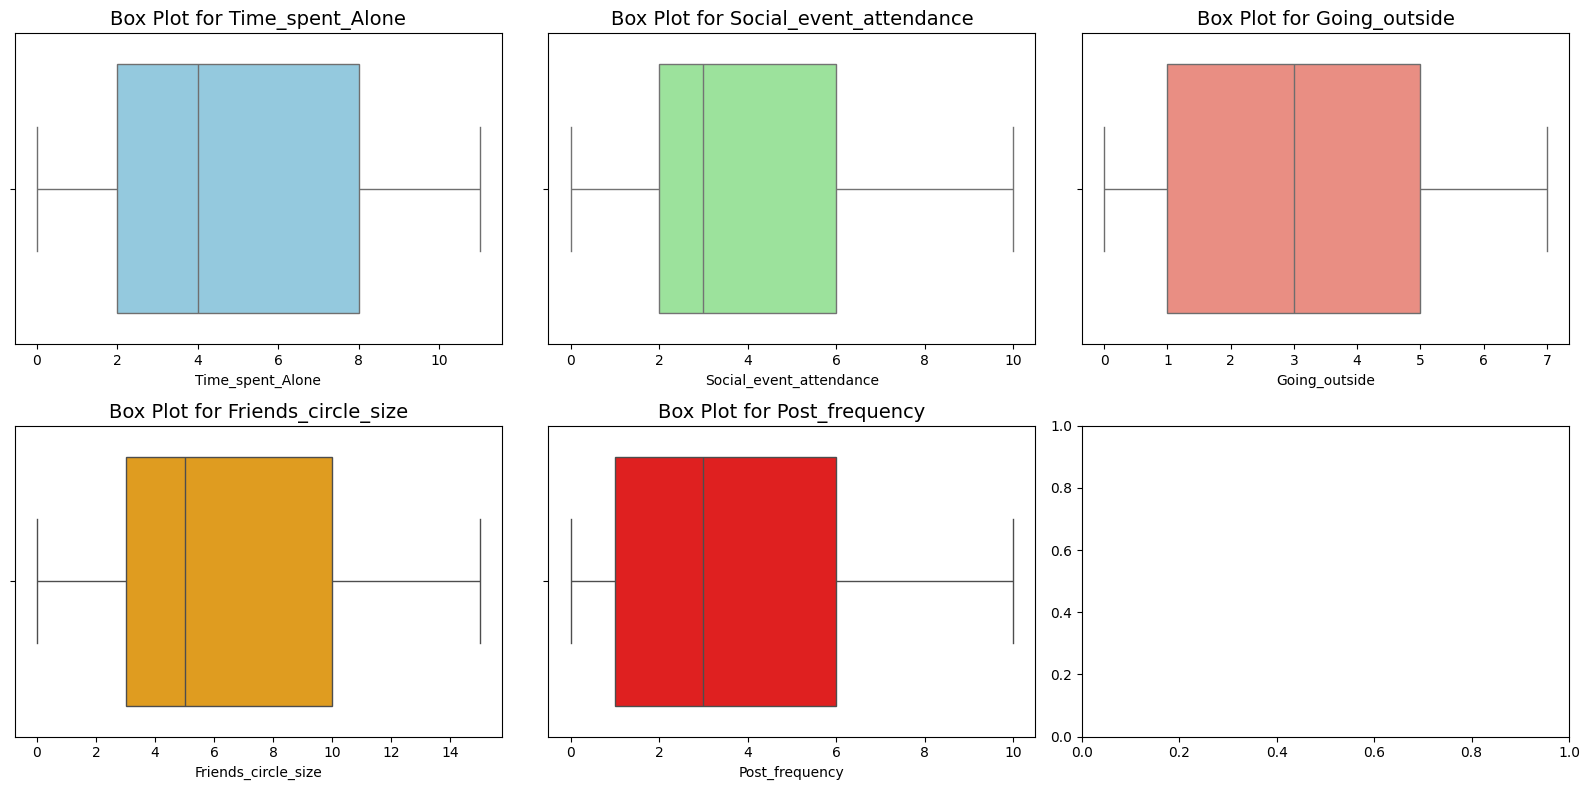

In [20]:
def get_boxplot(data, x_var):
    ncol_plots = 3
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize=(16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "salmon", "orange", "red", "purple"]
    for i, col in enumerate(x_var):
        sbn.boxplot(data=data, x=col, ax=ax[i], color=colors[i])
        ax[i].set_title(f"Box Plot for {col}", fontsize=14)
        ax[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()
get_boxplot(data, data.select_dtypes(include=["float64", "int64"]).columns.tolist())


In [21]:
var = ["Time_spent_Alone", "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency"]
data[var].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4.522406,3.939039,3.013726,6.239806,3.559548
std,3.491162,2.900044,2.257239,4.311365,2.927397
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


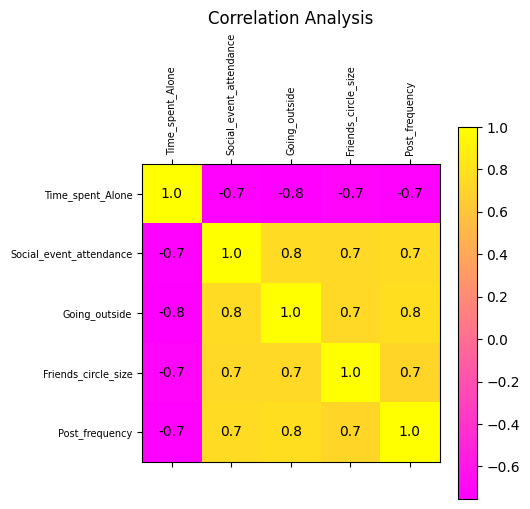

In [22]:
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "spring")
    plt.xticks(range(len(cols)), cols, rotation = 90, fontsize=7)
    plt.yticks(range(len(cols)), cols, fontsize=7)
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()
plot_correlation(data, var)

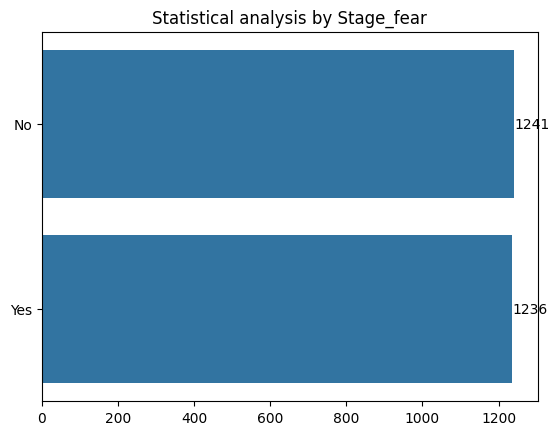

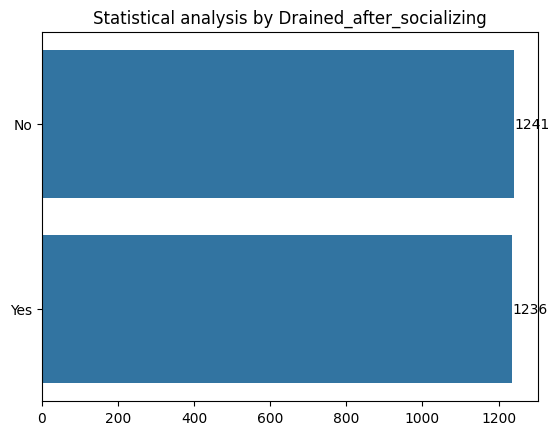

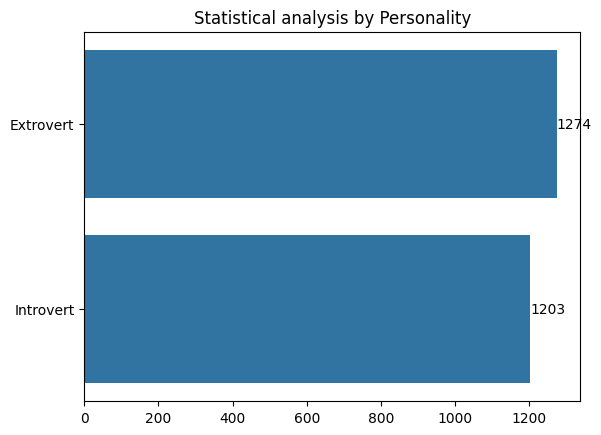

In [23]:
vari = data.select_dtypes(include=["object"]).columns.tolist()
def plot_barchart(data, vari):
    for col in vari:
        results = data[col].value_counts()
        ax = sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
        ax.bar_label(ax.containers[0], fontsize = 10, fmt = "%d")
        plt.title("Statistical analysis by " + col)
        plt.show()
plot_barchart(data, vari)

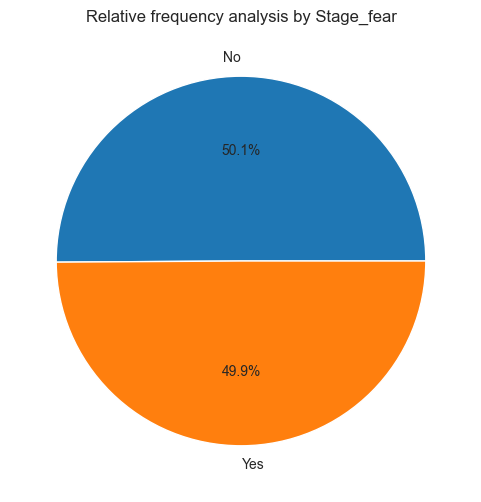

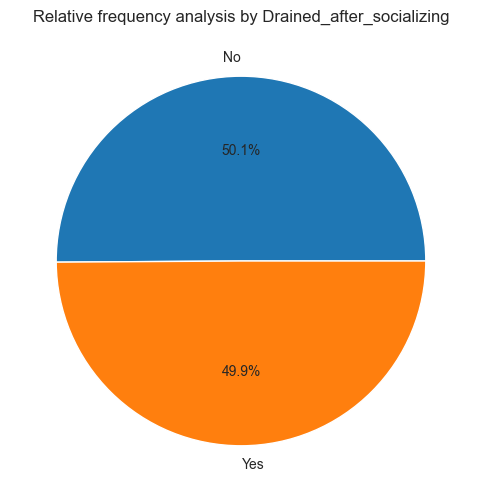

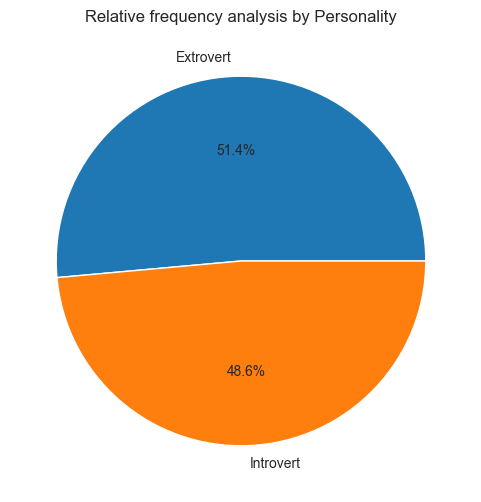

In [24]:
def plot_piechart(data, col):
    results = data[col].value_counts()
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()
for col in vari:
    plot_piechart(data, col)

In [25]:
group01 = data.groupby(["Stage_fear", "Personality"]).size().reset_index(name = "quantity")
print(group01)

  Stage_fear Personality  quantity
0         No   Extrovert      1165
1         No   Introvert        76
2        Yes   Extrovert       109
3        Yes   Introvert      1127


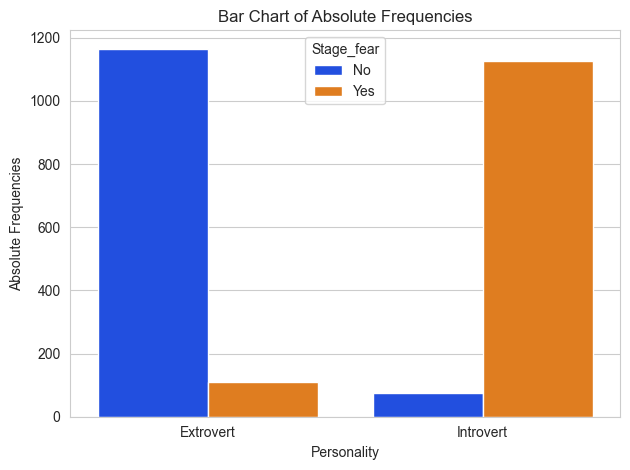

In [26]:
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "quantity", hue = g2, palette = "bright")
    plt.xlabel(g1)
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies')
    plt.tight_layout()
    plt.show()
plot_absfreq_groups(group01, "Personality", "Stage_fear")

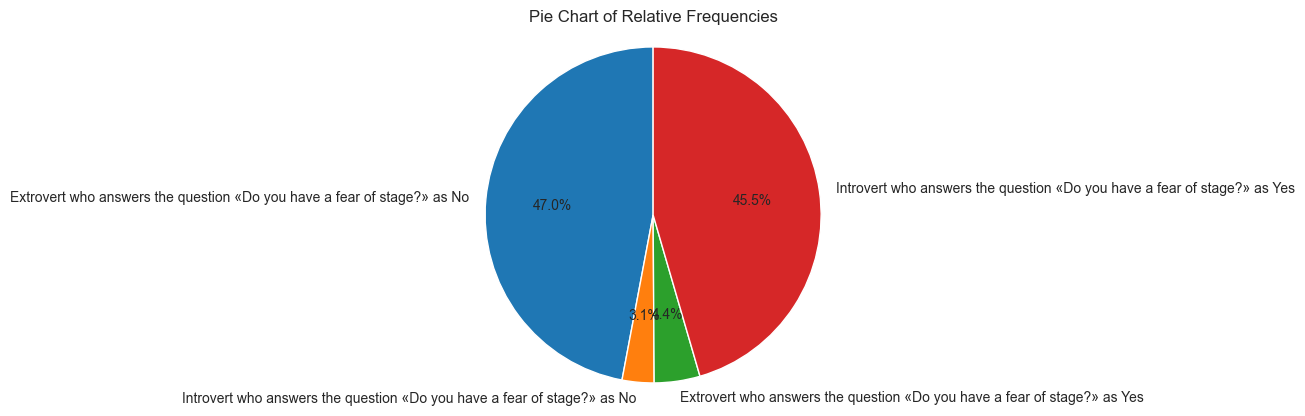

In [27]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " who answers the question «Do you have a fear of stage?» as " + group[g2]
    sizes = group["quantity"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies')
    plt.show()
plot_relfreq_groups(group01,  "Personality", "Stage_fear")